Comparison between orignal Graphs and Graphs with metric

In [3]:
!pip3 install dask[complete]==2023.5.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.6/966.6 kB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00


In [1]:
import dask.dataframe as dd
import pandas as pd
import csv


In [2]:
def get_column_names(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Read the first line
    return header

file_path = '../data/graph_metric.csv'
columns = get_column_names(file_path)
print(columns)

['_id', '_labels', 'found', 'id', 'timestamp', 'type', 'value', 'version', '_start', '_end', '_type', 'scope', 'targetVersion']


## Explore with Dask

In [3]:
dtype_dict = {col: 'object' for col in columns}
graph_metric_csv = dd.read_csv('../data/graph_metric.csv', dtype=dtype_dict)


In [4]:
graph_metric_csv.head()

,_id,_labels,found,id,timestamp,type,value,version,_start,_end,_type,scope,targetVersion
0,0,:Artifact,true,com.splendo.kaluga:alerts-androidlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,:Artifact,true,org.wso2.carbon.identity.framework:org.wso2.ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,:Artifact,true,org.apache.camel.quarkus:camel-quarkus-kotlin-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,:Release,NaN,org.wso2.carbon.identity.framework:org.wso2.ca...,1626148242000,NaN,NaN,5.20.111,NaN,NaN,NaN,NaN,NaN
4,4,:Release,NaN,org.apache.camel.quarkus:camel-quarkus-kotlin-...,1583239943000,NaN,NaN,1.0.0-M4,NaN,NaN,NaN,NaN,NaN


In [8]:
uni_ids = graph_metric_csv['id'].compute().unique()
# have to reduce nan
print(len(uni_ids))

59152713


In [ ]:
# get total unique metrics
type_stas=graph_metric_csv['type'].compute().value_counts()
print(type_stas)

In [ ]:
total_len = len(graph_metric_csv)
print("Total number of packages with releases is:", total_len)


In [ ]:
# check the unique CVEs number
uni_cves = graph_metric_csv[graph_metric_csv["type"]=="CVE"]["value"].compute().unique()
print(len(uni_cves))

In [ ]:
value_count_cves = graph_metric_csv[graph_metric_csv["type"]=="CVE"]["value"].compute().value_counts()
print(value_count_cves)

In [70]:
# check the percentage of non-blank CVEs
perc_csv = round(()/total_len, 6)
print(perc_csv)

0.000326


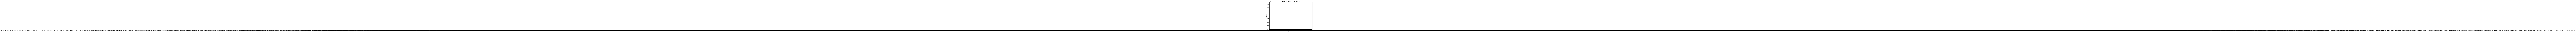

In [72]:
import matplotlib.pyplot as plt

# remove the blank value
value_count_cves_no_nan = value_count_cves.drop('{\"cve\":[]}', errors="ignore")

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
value_count_cves_no_nan.plot(kind='bar', color='skyblue')
plt.title('Value Counts of column_name')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.savefig("CEV_Value_Counts.png")
plt.show()

## Explore the Metrics and Normalize Metrics

In [6]:
# check the value and type of FRESHNESS
results = graph_metric_csv[graph_metric_csv['type']=="FRESHNESS"]["value"][:10].compute()
print(results)

1    {\"freshness\":{\"numberMissedRelease\":\"189\...
3    {\"freshness\":{\"numberMissedRelease\":\"309\...
5    {\"freshness\":{\"numberMissedRelease\":\"68\"...
7    {\"freshness\":{\"numberMissedRelease\":\"168\...
9    {\"freshness\":{\"numberMissedRelease\":\"62\"...
                           ...                        
1    {\"freshness\":{\"numberMissedRelease\":\"30\"...
3    {\"freshness\":{\"numberMissedRelease\":\"29\"...
5    {\"freshness\":{\"numberMissedRelease\":\"52\"...
7    {\"freshness\":{\"numberMissedRelease\":\"50\"...
9    {\"freshness\":{\"numberMissedRelease\":\"51\"...
Name: value, Length: 425, dtype: object


In [9]:
print(type(results[0]))

<class 'pandas.core.series.Series'>


In [14]:
import pandas as pd

unique_series = results.reset_index(drop=True)

# Convert to JSON
json_result = unique_series.to_json(orient='index')

In [16]:
json_result[0]

'{'

In [83]:
# check the value and type of Popularity
graph_metric_csv[graph_metric_csv['type']=="POPULARITY_1_YEAR"]["value"][:1000].value_counts().compute()


value
0      35479
1       1610
2        600
3        336
4        194
       ...  
148        1
373        1
149        1
365        1
98         1
Name: count, Length: 128, dtype: int64

In [82]:
# check the value and type of SPEED
graph_metric_csv[graph_metric_csv['type']=="SPEED"]["value"][:10].compute()

0                      0.0
1                      0.0
2      0.07142857142857142
3                      0.0
4                      0.0
5                      0.0
6      0.43478260869565216
7                      0.0
8     0.016877637130801686
9      0.13513513513513514
10    0.037037037037037035
Name: value, dtype: object

## normalize freshness

In [25]:
# create function to extract numbermissedrelease and outdatedTimeInMs, respectively
fresh_series = graph_metric_csv[graph_metric_csv['type']=="FRESHNESS"]["value"]

In [26]:
fresh_series.compute().head()

47937    {\"freshness\":{\"numberMissedRelease\":\"7\",...
47939    {\"freshness\":{\"numberMissedRelease\":\"2\",...
47941    {\"freshness\":{\"numberMissedRelease\":\"9\",...
47943    {\"freshness\":{\"numberMissedRelease\":\"367\...
47945    {\"freshness\":{\"numberMissedRelease\":\"448\...
Name: value, dtype: object

In [30]:
def str_to_json(escaped_json_str):
    try:
        clean_str = escaped_json_str.replace('\\"', '"')
        return json.loads(clean_str)
    except ValueError as e:
        print(f"Error parsing JSON: {e}")
        return None

    

In [25]:
graph_part_df = graph_metric_csv.copy().compute()[3000000:90000000]

In [26]:
graph_part_df[graph_part_df['type']=="FRESHNESS"]["value"].value_counts()

value
{\"freshness\":{\"numberMissedRelease\":\"0\",\"outdatedTimeInMs\":\"0\"}}                637311
{\"freshness\":{\"numberMissedRelease\":\"1\",\"outdatedTimeInMs\":\"1000\"}}                485
{\"freshness\":{\"numberMissedRelease\":\"2\",\"outdatedTimeInMs\":\"31129028000\"}}         267
{\"freshness\":{\"numberMissedRelease\":\"3\",\"outdatedTimeInMs\":\"32944399000\"}}         199
{\"freshness\":{\"numberMissedRelease\":\"2\",\"outdatedTimeInMs\":\"1000\"}}                187
                                                                                           ...  
{\"freshness\":{\"numberMissedRelease\":\"158\",\"outdatedTimeInMs\":\"73779759000\"}}         1
{\"freshness\":{\"numberMissedRelease\":\"96\",\"outdatedTimeInMs\":\"137927285000\"}}         1
{\"freshness\":{\"numberMissedRelease\":\"15\",\"outdatedTimeInMs\":\"141161249000\"}}         1
{\"freshness\":{\"numberMissedRelease\":\"28\",\"outdatedTimeInMs\":\"114296008000\"}}         1
{\"freshness\":{\"number

In [31]:
import json

part_fresh_json_series = graph_part_df[graph_part_df['type']=="FRESHNESS"]["value"].apply(lambda x: str_to_json(x))


In [32]:
graph_part_df["value"] = graph_part_df["value"].mask(graph_part_df['type'] == "FRESHNESS", part_fresh_json_series )


InvalidIndexError: 

In [ ]:
graph_part_df['numberMissedRelease'] = graph_part_df["value"].apply(lambda x: x['numberMissedRelease'] if isinstance(x, dict) else x)
graph_part_df["outdatedTimeInMs"] = graph_part_df["value"].apply(lambda x: x['outdatedTimeInMs'] if isinstance(x, dict) else x)


In [ ]:
graph_part_df[~graph_part_df['numberMissedRelease'].isna()]['numberMissedRelease'].head()

In [ ]:
# Min-max normalization function
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
# Normalize the attributes
graph_part_df['Normalized_Missed'] = min_max_normalize(graph_part_df['numberMissedRelease'])
graph_part_df['Normalized_Outdated'] = min_max_normalize(graph_part_df['outdatedTimeInMs'])

# Define weights
w1 = 0.5  # Weight for numberMissedRelease
w2 = 0.5  # Weight for outdatedTimeInMs

# Calculate combined freshness score
graph_part_df['Freshness_Score'] = w1 * graph_part_df['Normalized_Missed'] + w2 * graph_part_df['Normalized_Outdated']

# Display the result
print(graph_part_df[['id', 'Freshness_Score']])

In [ ]:
print(graph_part_df[graph_part_df["Freshness_Score"].isna()][['id', 'Freshness_Score']])